In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pyscf import gto, scf, fci
from utils import return_geometry

In [2]:
df = pd.read_csv("extracted_data.csv")
df = df.dropna()
df[["R value", "Charge", "Spin", "Bond Length", "Number of Qubits [JW Hamiltonian]", "Number of Qubits [Ising Hamiltonian]", "Ising Energy [Hartree]", "Total Calculation Time [s]"]] = df[["R value", "Charge", "Spin", "Bond Length", "Number of Qubits [JW Hamiltonian]", "Number of Qubits [Ising Hamiltonian]", "Ising Energy [Hartree]", "Total Calculation Time [s]"]].apply(pd.to_numeric)

In [3]:
# H2 FCI

fci_bond_lengths = np.linspace(0.3, 5.0, 100)
rhf_H2_fci_energies = []

for bond_length in fci_bond_lengths:
    mol = gto.Mole()
    mol.build(
        atom = f'H 0 0 0; H 0 0 {bond_length}', 
        basis = 'sto-3g', 
        unit = 'angstrom')

    rhf_mf = scf.RHF(mol)
    rhf_mf.kernel()

    rhf_cisolver = fci.FCI(rhf_mf)
    rhf_fci_energy = rhf_cisolver.kernel()[0]
    rhf_H2_fci_energies.append(rhf_fci_energy)

converged SCF energy = -0.593827758535728
converged SCF energy = -0.772772303655966
converged SCF energy = -0.893973298488002
converged SCF energy = -0.976946889438822
converged SCF energy = -1.03356978715943
converged SCF energy = -1.07144473111346
converged SCF energy = -1.09566401876598
converged SCF energy = -1.10978030479424
converged SCF energy = -1.11635594035863
converged SCF energy = -1.11728125250215
converged SCF energy = -1.11396661177069
converged SCF energy = -1.10746689235535
converged SCF energy = -1.09856972491628
converged SCF energy = -1.08786288704534
converged SCF energy = -1.07578743670532
converged SCF energy = -1.06267920002526
converged SCF energy = -1.04879997009723
converged SCF energy = -1.03435977113392
converged SCF energy = -1.01953185295069
converged SCF energy = -1.00446224571356
converged SCF energy = -0.989275603842699
converged SCF energy = -0.974078761713812
converged SCF energy = -0.958963030993083
converged SCF energy = -0.944005893625329
converge

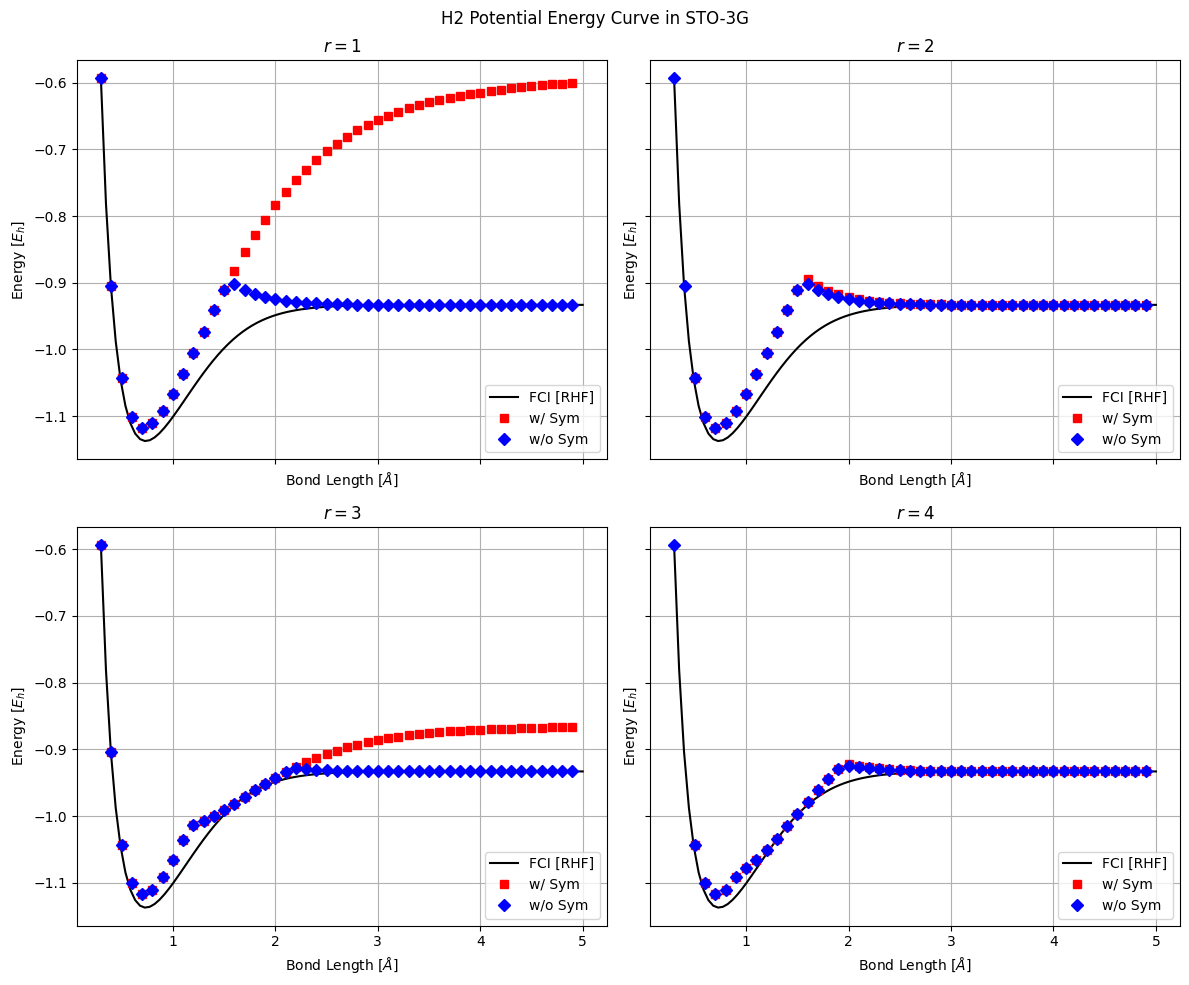

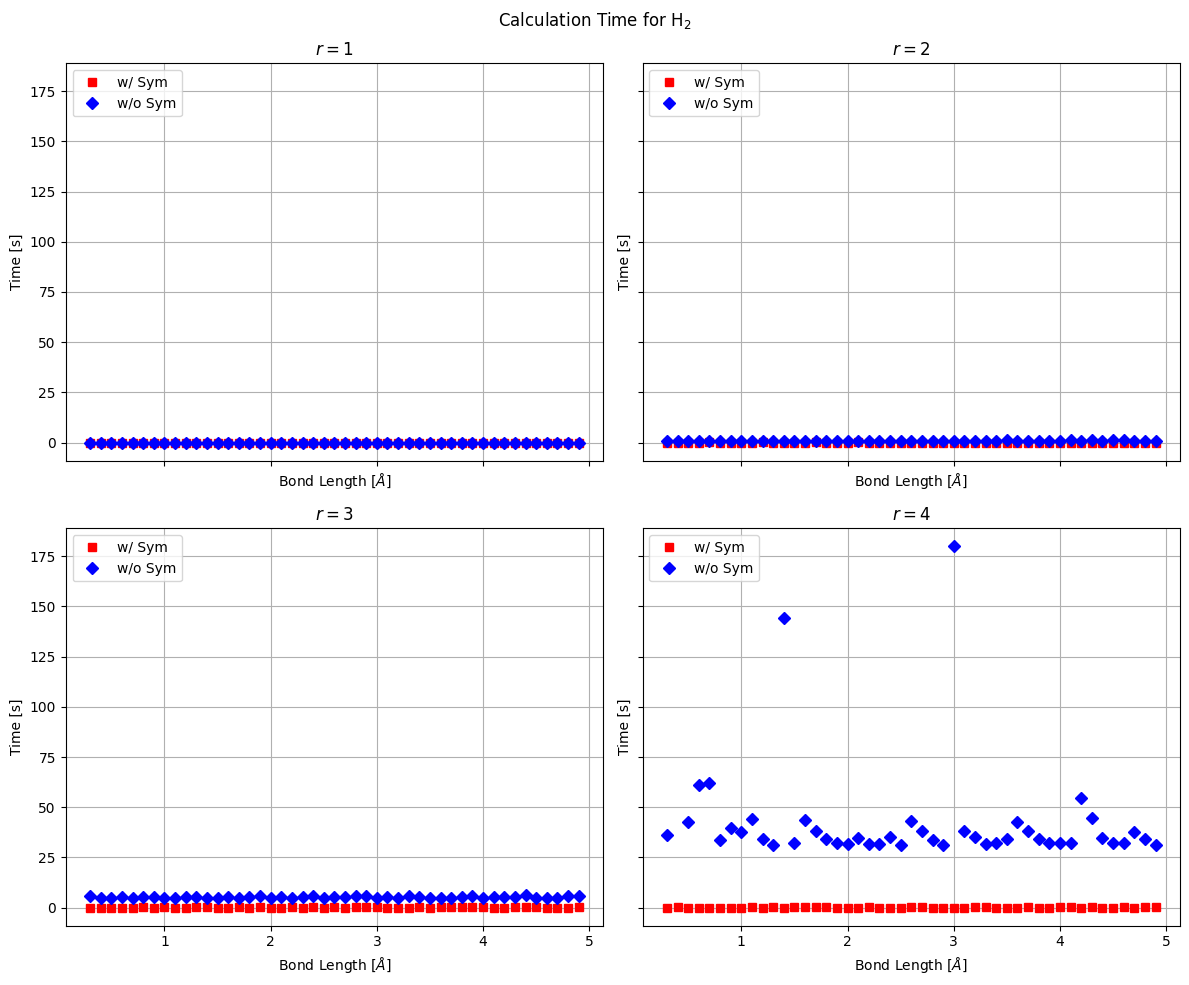

In [4]:
# H2 plots

# potential energy curves 
fig, axs = plt.subplots(ncols = 2, nrows = 2, figsize = (12,10), sharex=True, sharey=True)
axs = axs.flatten()

for r in [1,2,3,4]:
    ax = axs[r-1]
    
    ax.plot(fci_bond_lengths, rhf_H2_fci_energies, "-k", label = "FCI [RHF]")
    ax.plot(df["Bond Length"][df["Molecule"]=="H2"][df["Basis Set"]=="sto-3g"][df["Symmetry Case"]=="yes"][df["R value"]==r], df["Ising Energy [Hartree]"][df["Basis Set"]=="sto-3g"][df["Molecule"]=="H2"][df["Symmetry Case"]=="yes"][df["R value"]==r], 
            "sr", label = "w/ Sym")
    ax.plot(df["Bond Length"][df["Molecule"]=="H2"][df["Basis Set"]=="sto-3g"][df["Symmetry Case"]=="no"][df["R value"]==r], df["Ising Energy [Hartree]"][df["Basis Set"]=="sto-3g"][df["Molecule"]=="H2"][df["Symmetry Case"]=="no"][df["R value"]==r], 
            "Db", label = "w/o Sym")

    ax.set_title(f"$r=${r}")

    ax.legend(loc="lower right")
    ax.grid()
    ax.set_ylabel("Energy [$E_h$]")
    ax.set_xlabel("Bond Length [$\AA$]")
fig.suptitle("H2 Potential Energy Curve in STO-3G")
fig.tight_layout()

"""
# calculation time 
fig, axs = plt.subplots(ncols = 2, nrows = 2, figsize = (12,10), sharex=True, sharey=True)
axs = axs.flatten()

for r in [1,2,3,4]:
    ax = axs[r-1]
    
    ax.plot(df["Bond Length"][df["Molecule"]=="H2"][df["Symmetry Case"]=="yes"][df["R value"]==r], df["Total Calculation Time [s]"][df["Molecule"]=="H2"][df["Symmetry Case"]=="yes"][df["R value"]==r], 
            "sr", label = "w/ Sym")
    ax.plot(df["Bond Length"][df["Molecule"]=="H2"][df["Symmetry Case"]=="no"][df["R value"]==r], df["Total Calculation Time [s]"][df["Molecule"]=="H2"][df["Symmetry Case"]=="no"][df["R value"]==r], 
            "Db", label = "w/o Sym")

    ax.set_title(f"$r=${r}")

    ax.legend(loc="upper left")
    ax.grid()
    ax.set_ylabel("Time [s]")
    ax.set_xlabel("Bond Length [$\AA$]")
fig.suptitle("Calculation Time for H$_2$")
fig.tight_layout()"""

In [5]:
# He2 FCI

fci_bond_lengths = np.linspace(0.3, 5.0, 100)
rhf_He2_fci_energies = []

for bond_length in fci_bond_lengths:
    mol = gto.Mole()
    mol.build(
        atom = f'He 0 0 0; He 0 0 {bond_length}', 
        basis = 'sto-3g', 
        unit = 'angstrom')

    rhf_mf = scf.RHF(mol)
    rhf_mf.kernel()

    rhf_cisolver = fci.FCI(rhf_mf)
    rhf_fci_energy = rhf_cisolver.kernel()[0]
    rhf_He2_fci_energies.append(rhf_fci_energy)

converged SCF energy = -0.948047682295934
converged SCF energy = -2.00662991831623
converged SCF energy = -2.79404378707511
converged SCF energy = -3.39132359242909
converged SCF energy = -3.85038065162339
converged SCF energy = -4.20653786155615
converged SCF energy = -4.48502744445536
converged SCF energy = -4.70443132233464
converged SCF energy = -4.87860044319067
converged SCF energy = -5.01786849957655
converged SCF energy = -5.12993709458442
converged SCF energy = -5.22056835881969
converged SCF energy = -5.29412179349881
converged SCF energy = -5.35395104232989
converged SCF energy = -5.40268256333577
converged SCF energy = -5.4424048502435
converged SCF energy = -5.47479633147829
converged SCF energy = -5.50121423833143
converged SCF energy = -5.52275947661929
converged SCF energy = -5.54032644837093
converged SCF energy = -5.55464269660533
converged SCF energy = -5.56630095698106
converged SCF energy = -5.57578510317743
converged SCF energy = -5.58349102279339
converged SCF en

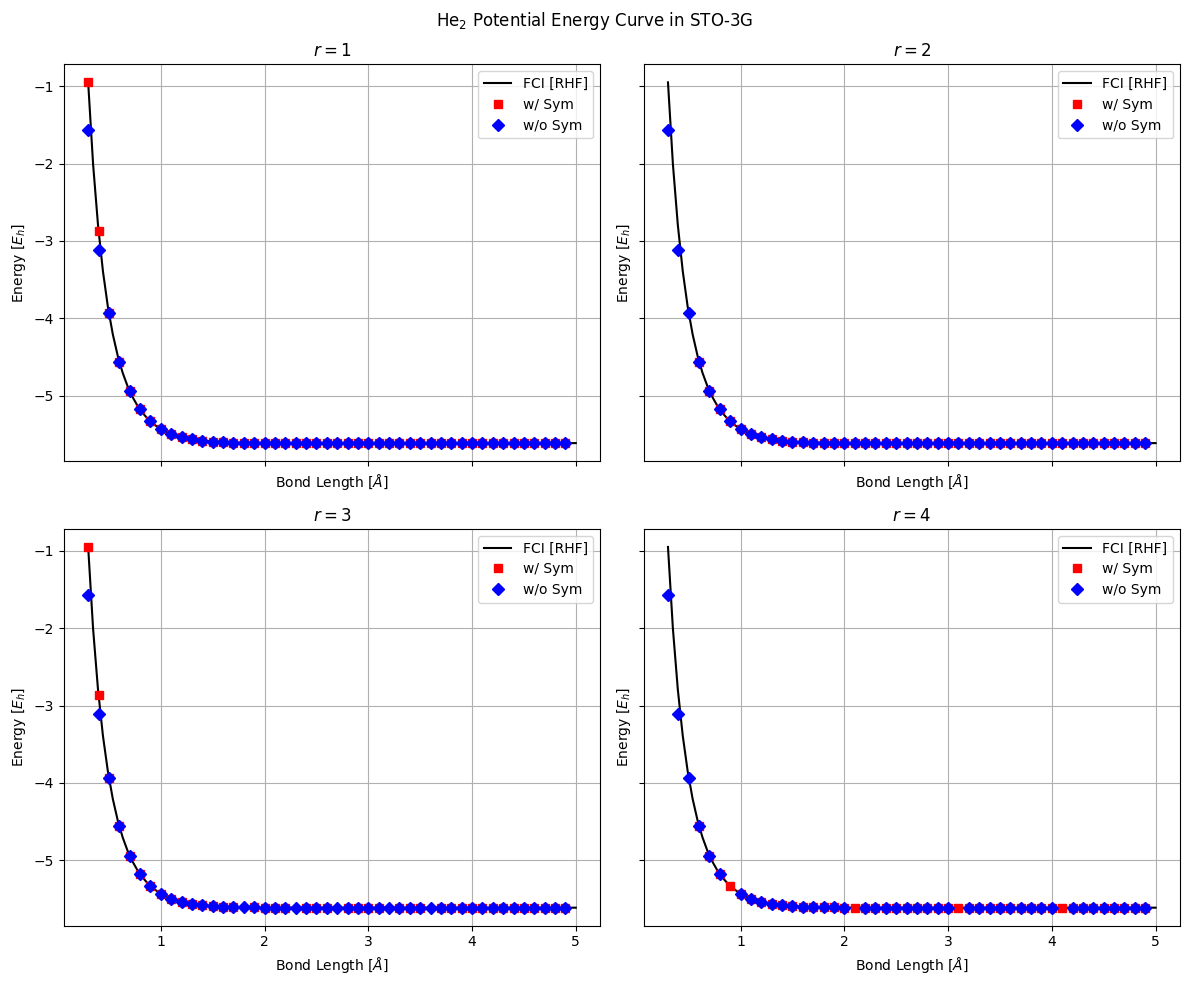

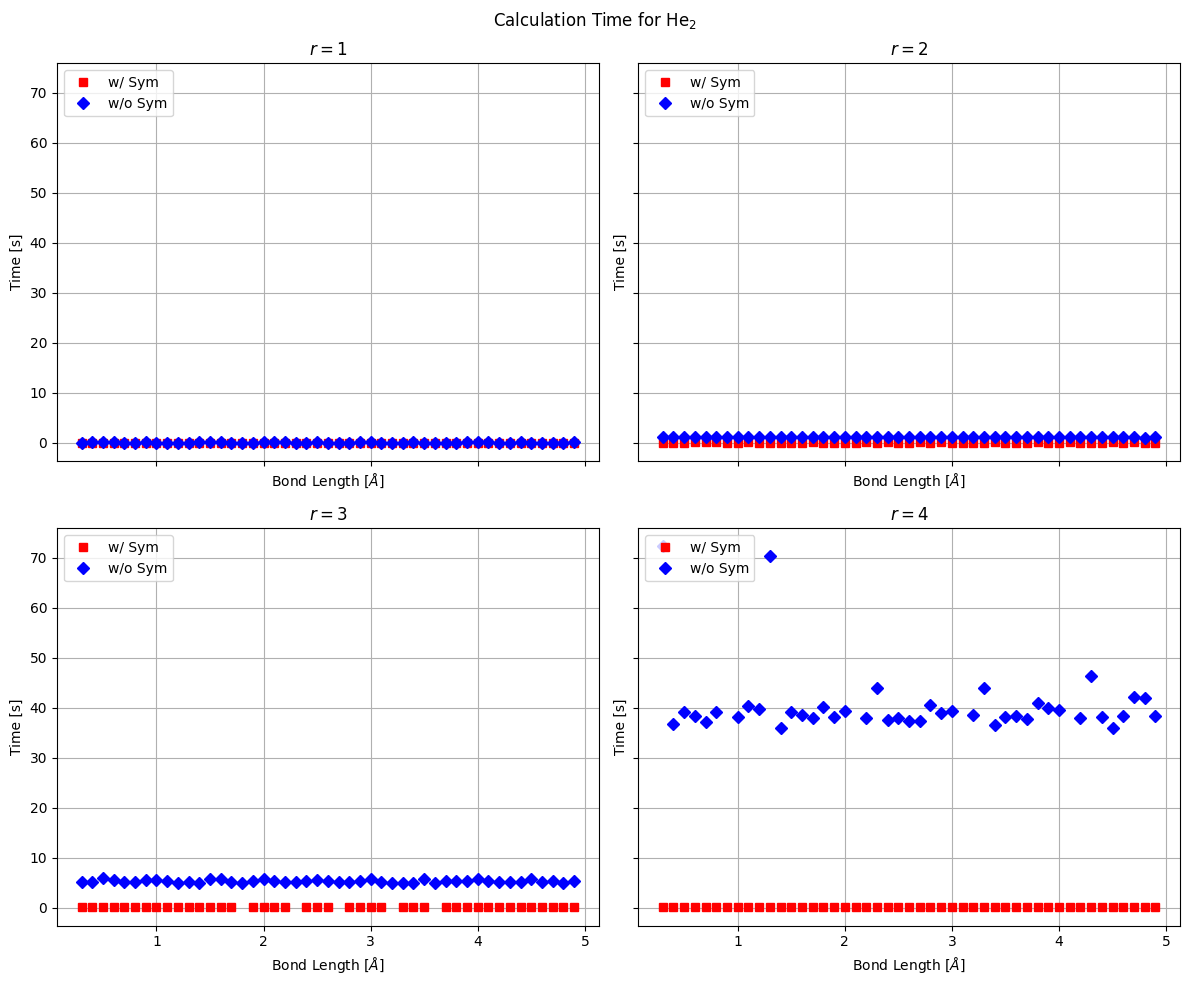

In [6]:
# He2 plots

# potential energy curves
fig, axs = plt.subplots(ncols = 2, nrows = 2, figsize = (12,10), sharex=True, sharey=True)
axs = axs.flatten()

for r in [1,2,3,4]:
    ax = axs[r-1]
    
    ax.plot(fci_bond_lengths, rhf_He2_fci_energies, "-k", label = "FCI [RHF]")
    ax.plot(df["Bond Length"][df["Molecule"]=="He2"][df["Basis Set"]=="sto-3g"][df["Symmetry Case"]=="yes"][df["R value"]==r], df["Ising Energy [Hartree]"][df["Molecule"]=="He2"][df["Symmetry Case"]=="yes"][df["R value"]==r], 
            "sr", label = "w/ Sym")
    ax.plot(df["Bond Length"][df["Molecule"]=="He2"][df["Symmetry Case"]=="no"][df["R value"]==r], df["Ising Energy [Hartree]"][df["Molecule"]=="He2"][df["Symmetry Case"]=="no"][df["R value"]==r], 
            "Db", label = "w/o Sym")

    ax.set_title(f"$r=${r}")
    ax.legend(loc="upper right")
    ax.grid()
    ax.set_ylabel("Energy [$E_h$]")
    ax.set_xlabel("Bond Length [$\AA$]")
fig.suptitle("He$_2$ Potential Energy Curve in STO-3G")
fig.tight_layout()

"""
# calculation time
fig, axs = plt.subplots(ncols = 2, nrows = 2, figsize = (12,10), sharex=True, sharey=True)
axs = axs.flatten()

for r in [1,2,3,4]:
    ax = axs[r-1]
    
    ax.plot(df["Bond Length"][df["Molecule"]=="He2"][df["Symmetry Case"]=="yes"][df["R value"]==r], df["Total Calculation Time [s]"][df["Molecule"]=="He2"][df["Symmetry Case"]=="yes"][df["R value"]==r], 
            "sr", label = "w/ Sym")
    ax.plot(df["Bond Length"][df["Molecule"]=="He2"][df["Symmetry Case"]=="no"][df["R value"]==r], df["Total Calculation Time [s]"][df["Molecule"]=="He2"][df["Symmetry Case"]=="no"][df["R value"]==r], 
            "Db", label = "w/o Sym")

    ax.set_title(f"$r=${r}")

    ax.legend(loc="upper left")
    ax.grid()
    ax.set_ylabel("Time [s]")
    ax.set_xlabel("Bond Length [$\AA$]")
fig.suptitle("Calculation Time for He$_2$")
fig.tight_layout()"""

In [7]:
# LiH FCI

fci_bond_lengths = np.linspace(0.3, 5.0, 100)
rhf_LiH_fci_energies = []

for bond_length in fci_bond_lengths:
    mol = gto.Mole()
    mol.build(
        atom = f'Li 0 0 0; H 0 0 {bond_length}', 
        basis = 'sto-3g', 
        unit = 'angstrom')

    rhf_mf = scf.RHF(mol)
    rhf_mf.kernel()

    rhf_cisolver = fci.FCI(rhf_mf)
    rhf_fci_energy = rhf_cisolver.kernel()[0]
    rhf_LiH_fci_energies.append(rhf_fci_energy)

converged SCF energy = -5.84243683078953
converged SCF energy = -6.27596417617278
converged SCF energy = -6.58276376827128
converged SCF energy = -6.81294973745282
converged SCF energy = -6.99447977032092
converged SCF energy = -7.14233748870199
converged SCF energy = -7.26485676556757
converged SCF energy = -7.36734938110659
converged SCF energy = -7.45352595992894
converged SCF energy = -7.52612868622538
converged SCF energy = -7.58729066220685
converged SCF energy = -7.63874331674276
converged SCF energy = -7.6819332841663
converged SCF energy = -7.71808796582361
converged SCF energy = -7.7482538455102
converged SCF energy = -7.77332171844947
converged SCF energy = -7.79404647991811
converged SCF energy = -7.81106491499387
converged SCF energy = -7.82491250175422
converged SCF energy = -7.83603912072972
converged SCF energy = -7.84482326209429
converged SCF energy = -7.85158441610632
converged SCF energy = -7.85659354219527
converged SCF energy = -7.86008169863931
converged SCF ener

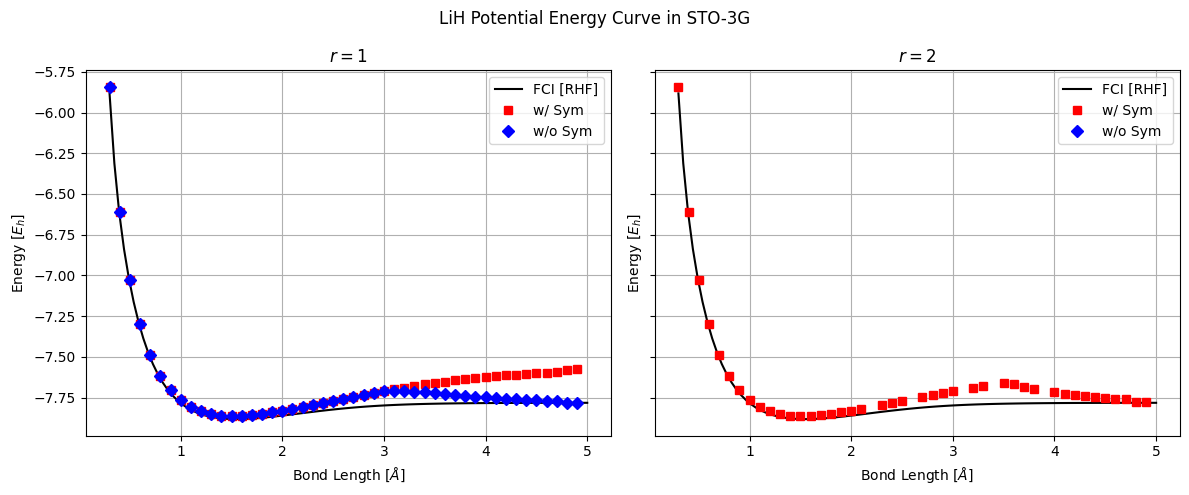

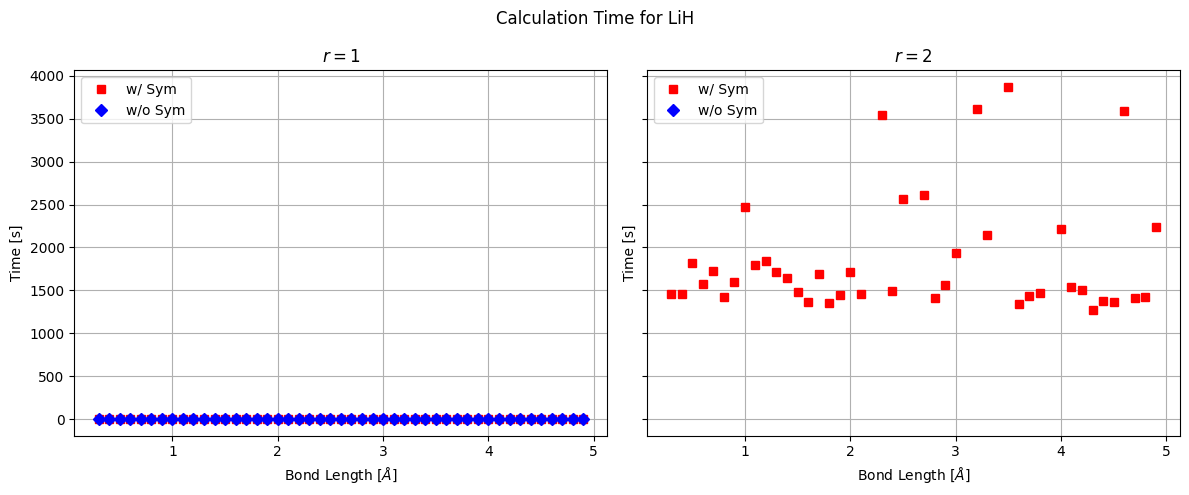

In [8]:
# LiH plots

# potential energy surfaces
fig, axs = plt.subplots(ncols = 2, figsize = (12,5), sharex=True, sharey=True)
axs = axs.flatten()

for r in [1,2]:
    ax = axs[r-1]
    
    ax.plot(fci_bond_lengths, rhf_LiH_fci_energies, "-k", label = "FCI [RHF]")
    ax.plot(df["Bond Length"][df["Molecule"]=="LiH"][df["Symmetry Case"]=="yes"][df["R value"]==r], df["Ising Energy [Hartree]"][df["Molecule"]=="LiH"][df["Symmetry Case"]=="yes"][df["R value"]==r], 
            "sr", label = "w/ Sym")
    ax.plot(df["Bond Length"][df["Molecule"]=="LiH"][df["Symmetry Case"]=="no"][df["R value"]==r], df["Ising Energy [Hartree]"][df["Molecule"]=="LiH"][df["Symmetry Case"]=="no"][df["R value"]==r], 
            "Db", label = "w/o Sym")

    ax.set_title(f"$r=${r}")
    ax.legend(loc="upper right")
    ax.grid()
    ax.set_ylabel("Energy [$E_h$]")
    ax.set_xlabel("Bond Length [$\AA$]")
fig.suptitle("LiH Potential Energy Curve in STO-3G")
fig.tight_layout()

"""
# calculation time
fig, axs = plt.subplots(ncols = 2, figsize = (12,5), sharex=True, sharey=True)
axs = axs.flatten()

for r in [1,2]:
    ax = axs[r-1]
    
    ax.plot(df["Bond Length"][df["Molecule"]=="LiH"][df["Symmetry Case"]=="yes"][df["R value"]==r], df["Total Calculation Time [s]"][df["Molecule"]=="LiH"][df["Symmetry Case"]=="yes"][df["R value"]==r], 
            "sr", label = "w/ Sym")
    ax.plot(df["Bond Length"][df["Molecule"]=="LiH"][df["Symmetry Case"]=="no"][df["R value"]==r], df["Total Calculation Time [s]"][df["Molecule"]=="LiH"][df["Symmetry Case"]=="no"][df["R value"]==r], 
            "Db", label = "w/o Sym")

    ax.set_title(f"$r=${r}")

    ax.legend(loc="upper left")
    ax.grid()
    ax.set_ylabel("Time [s]")
    ax.set_xlabel("Bond Length [$\AA$]")
fig.suptitle("Calculation Time for LiH")
fig.tight_layout()"""

In [9]:
# H2O FCI

fci_bond_lengths = np.linspace(0.3, 5.0, 100)
rhf_H2O_fci_energies = []

for bond_length in fci_bond_lengths:
    mol = gto.Mole()
    mol.build(
        atom = return_geometry("H2O", bond_length), 
        basis = 'sto-3g', 
        unit = 'angstrom')

    rhf_mf = scf.RHF(mol)
    rhf_mf.kernel()

    rhf_cisolver = fci.FCI(rhf_mf)
    rhf_fci_energy = rhf_cisolver.kernel()[0]
    rhf_H2O_fci_energies.append(rhf_fci_energy)

converged SCF energy = -66.6326669810703
converged SCF energy = -69.1697760849251
converged SCF energy = -70.9130132273211
converged SCF energy = -72.1238376403934
converged SCF energy = -72.9776615415157
converged SCF energy = -73.5843269520117
converged SCF energy = -74.0173337336482
converged SCF energy = -74.3264881005135
converged SCF energy = -74.546109055737
converged SCF energy = -74.7006756317611
converged SCF energy = -74.8081121144884
converged SCF energy = -74.8802730251265
converged SCF energy = -74.9262953038965
converged SCF energy = -74.9525788701604
converged SCF energy = -74.9638681667634
converged SCF energy = -74.9636854756247
converged SCF energy = -74.9547427878524
converged SCF energy = -74.9391335523182
converged SCF energy = -74.9184868094141
converged SCF energy = -74.8941301751196
converged SCF energy = -74.8670104224621
converged SCF energy = -74.8380460241844
converged SCF energy = -74.8077296214735
converged SCF energy = -74.7765031434872
converged SCF ene

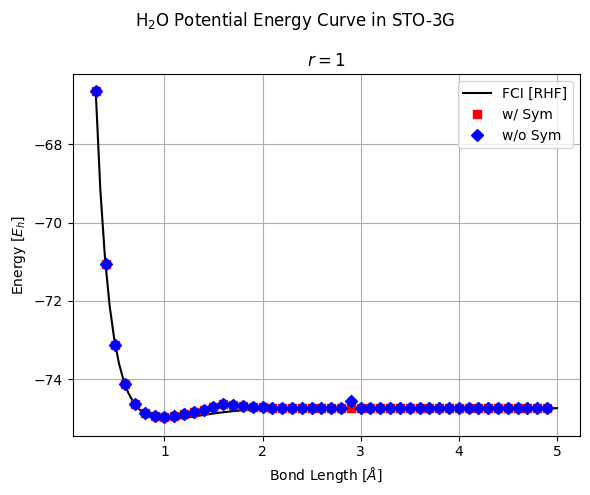

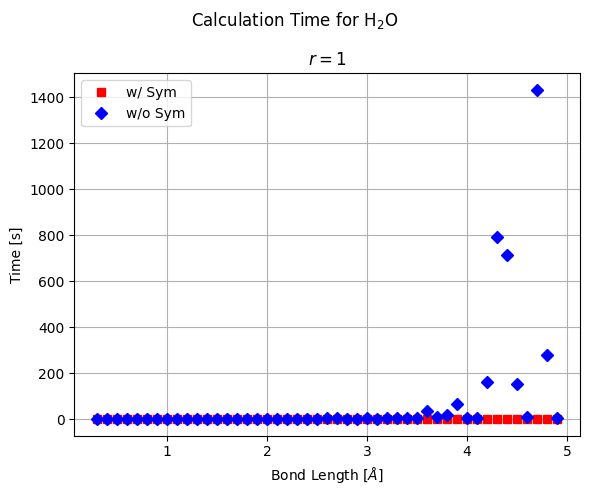

In [10]:
# H2O plots

# potential energy surfaces
fig, ax = plt.subplots(figsize = (6,5))

ax.plot(fci_bond_lengths, rhf_H2O_fci_energies, "-k", label = "FCI [RHF]")
ax.plot(df["Bond Length"][df["Molecule"]=="H2O"][df["Symmetry Case"]=="yes"][df["R value"]==1], df["Ising Energy [Hartree]"][df["Molecule"]=="H2O"][df["Symmetry Case"]=="yes"][df["R value"]==1], 
            "sr", label = "w/ Sym")
ax.plot(df["Bond Length"][df["Molecule"]=="H2O"][df["Symmetry Case"]=="no"][df["R value"]==1], df["Ising Energy [Hartree]"][df["Molecule"]=="H2O"][df["Symmetry Case"]=="no"][df["R value"]==1], 
            "Db", label = "w/o Sym")

ax.set_title(f"$r=${1}")
ax.legend(loc="upper right")
ax.grid()
ax.set_ylabel("Energy [$E_h$]")
ax.set_xlabel("Bond Length [$\AA$]")
fig.suptitle("H$_2$O Potential Energy Curve in STO-3G")
fig.tight_layout()

"""
# calculation time
fig, ax = plt.subplots(figsize = (6,5)) 
    
ax.plot(df["Bond Length"][df["Molecule"]=="H2O"][df["Symmetry Case"]=="yes"][df["R value"]==1], df["Total Calculation Time [s]"][df["Molecule"]=="H2O"][df["Symmetry Case"]=="yes"][df["R value"]==1], 
            "sr", label = "w/ Sym")
ax.plot(df["Bond Length"][df["Molecule"]=="H2O"][df["Symmetry Case"]=="no"][df["R value"]==1], df["Total Calculation Time [s]"][df["Molecule"]=="H2O"][df["Symmetry Case"]=="no"][df["R value"]==1], 
            "Db", label = "w/o Sym")

ax.set_title(f"$r=${1}")
ax.legend(loc="upper left")
ax.grid()
ax.set_ylabel("Time [s]")
ax.set_xlabel("Bond Length [$\AA$]")
fig.suptitle("Calculation Time for H$_2$O")
fig.tight_layout"""

In [11]:
# BH3 FCI

fci_bond_lengths = np.linspace(0.3, 5.0, 100)
rhf_BH3_fci_energies = []

for bond_length in fci_bond_lengths:
    mol = gto.Mole()
    mol.build(
        atom = return_geometry("BH3", bond_length), 
        basis = 'sto-3g', 
        unit = 'angstrom')

    rhf_mf = scf.RHF(mol)
    rhf_mf.kernel()

    rhf_cisolver = fci.FCI(rhf_mf)
    rhf_fci_energy = rhf_cisolver.kernel()[0]
    rhf_BH3_fci_energies.append(rhf_fci_energy)

converged SCF energy = -15.2064697621788
converged SCF energy = -17.8948584246485
converged SCF energy = -19.8179386633559
converged SCF energy = -21.2315153067845
converged SCF energy = -22.2872603491601
converged SCF energy = -23.0907850620956
converged SCF energy = -23.7131250243963
converged SCF energy = -24.2022989644054
converged SCF energy = -24.5883499758271
converged SCF energy = -24.8926410833328
converged SCF energy = -25.1316921518085
converged SCF energy = -25.3176170011577
converged SCF energy = -25.4613377744943
converged SCF energy = -25.5712745578884
converged SCF energy = -25.6541061248169
converged SCF energy = -25.7152147158795
converged SCF energy = -25.7588513584225
converged SCF energy = -25.7884341761172
converged SCF energy = -25.8065487343622
converged SCF energy = -25.8154259598979
converged SCF energy = -25.8167817864779
converged SCF energy = -25.8119998274312
converged SCF energy = -25.8022746851876
converged SCF energy = -25.788521634408
converged SCF ene

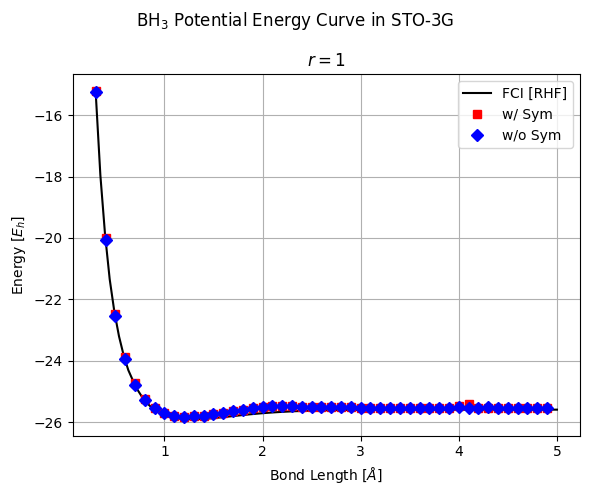

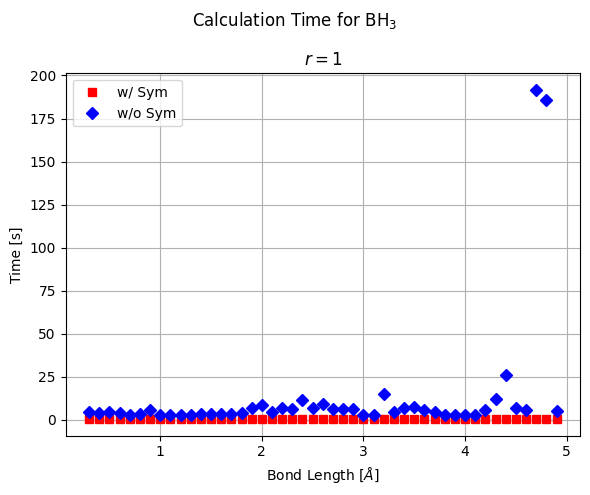

In [12]:
# BH3 plots

# potential energy surfaces
fig, ax = plt.subplots(figsize = (6,5))

ax.plot(fci_bond_lengths, rhf_BH3_fci_energies, "-k", label = "FCI [RHF]")
ax.plot(df["Bond Length"][df["Molecule"]=="BH3"][df["Symmetry Case"]=="yes"][df["R value"]==1], df["Ising Energy [Hartree]"][df["Molecule"]=="BH3"][df["Symmetry Case"]=="yes"][df["R value"]==1], 
            "sr", label = "w/ Sym")
ax.plot(df["Bond Length"][df["Molecule"]=="BH3"][df["Symmetry Case"]=="no"][df["R value"]==1], df["Ising Energy [Hartree]"][df["Molecule"]=="BH3"][df["Symmetry Case"]=="no"][df["R value"]==1], 
            "Db", label = "w/o Sym")

ax.set_title(f"$r=${1}")
ax.legend(loc="upper right")
ax.grid()
ax.set_ylabel("Energy [$E_h$]")
ax.set_xlabel("Bond Length [$\AA$]")
fig.suptitle("BH$_3$ Potential Energy Curve in STO-3G")
fig.tight_layout()

"""
# calculation time
fig, ax = plt.subplots(figsize = (6,5)) 
    
ax.plot(df["Bond Length"][df["Molecule"]=="BH3"][df["Symmetry Case"]=="yes"][df["R value"]==1], df["Total Calculation Time [s]"][df["Molecule"]=="BH3"][df["Symmetry Case"]=="yes"][df["R value"]==1], 
            "sr", label = "w/ Sym")
ax.plot(df["Bond Length"][df["Molecule"]=="BH3"][df["Symmetry Case"]=="no"][df["R value"]==1], df["Total Calculation Time [s]"][df["Molecule"]=="BH3"][df["Symmetry Case"]=="no"][df["R value"]==1], 
            "Db", label = "w/o Sym")

ax.set_title(f"$r=${1}")
ax.legend(loc="upper left")
ax.grid()
ax.set_ylabel("Time [s]")
ax.set_xlabel("Bond Length [$\AA$]")
fig.suptitle("Calculation Time for BH$_3$")
fig.tight_layout()"""

In [13]:
# NH3 FCI

fci_bond_lengths = np.linspace(0.3, 5.0, 100)
rhf_NH3_fci_energies = []

for bond_length in fci_bond_lengths:
    mol = gto.Mole()
    mol.build(
        atom = return_geometry("NH3", bond_length), 
        basis = 'sto-3g', 
        unit = 'angstrom')

    rhf_mf = scf.RHF(mol)
    rhf_mf.kernel()

    rhf_cisolver = fci.FCI(rhf_mf)
    rhf_fci_energy = rhf_cisolver.kernel()[0]
    rhf_NH3_fci_energies.append(rhf_fci_energy)

converged SCF energy = -46.6276979160685
converged SCF energy = -49.4371883811946
converged SCF energy = -51.3306988489105
converged SCF energy = -52.6240456437387
converged SCF energy = -53.5147739189446
converged SCF energy = -54.1370003102889
converged SCF energy = -54.5710242737609
converged SCF energy = -54.871839448411
converged SCF energy = -55.0782967515233
converged SCF energy = -55.21613273415
converged SCF energy = -55.3041331545337
converged SCF energy = -55.3550997723772
converged SCF energy = -55.3787628134122
converged SCF energy = -55.3820826616216
converged SCF energy = -55.3703167725794
converged SCF energy = -55.3473755775261
converged SCF energy = -55.3162997669937
converged SCF energy = -55.2792305782358
converged SCF energy = -55.2379498811425
converged SCF energy = -55.1939061625984
converged SCF energy = -55.1478727778047
converged SCF energy = -55.100871621657
converged SCF energy = -55.0533911314149
converged SCF energy = -55.0059725149304
converged SCF energy

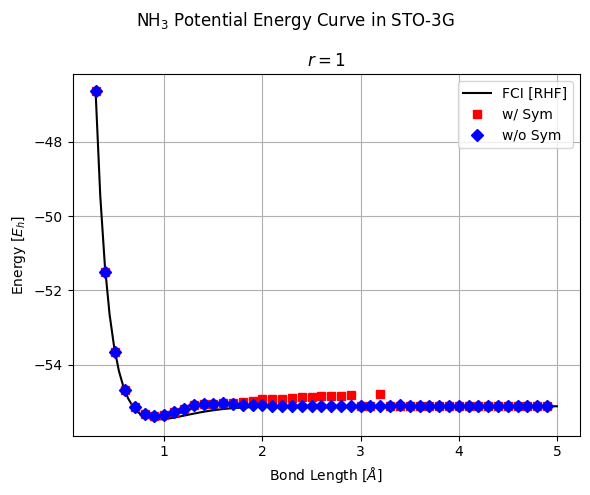

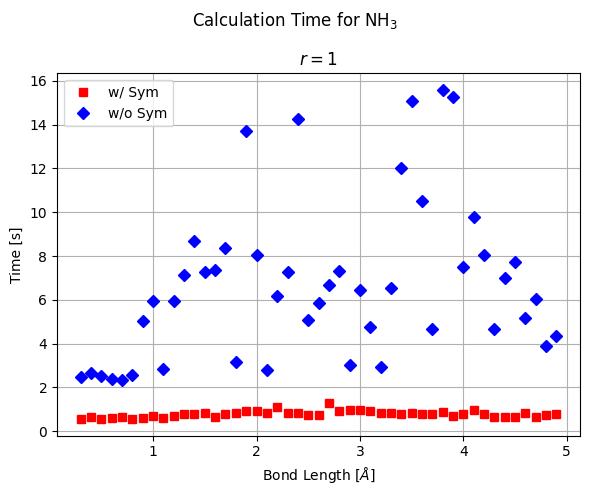

In [14]:
# NH3 plots

# potential energy surfaces
fig, ax = plt.subplots(figsize = (6,5))

ax.plot(fci_bond_lengths, rhf_NH3_fci_energies, "-k", label = "FCI [RHF]")
ax.plot(df["Bond Length"][df["Molecule"]=="NH3"][df["Symmetry Case"]=="yes"][df["R value"]==1], df["Ising Energy [Hartree]"][df["Molecule"]=="NH3"][df["Symmetry Case"]=="yes"][df["R value"]==1], 
            "sr", label = "w/ Sym")
ax.plot(df["Bond Length"][df["Molecule"]=="NH3"][df["Symmetry Case"]=="no"][df["R value"]==1], df["Ising Energy [Hartree]"][df["Molecule"]=="NH3"][df["Symmetry Case"]=="no"][df["R value"]==1], 
            "Db", label = "w/o Sym")

ax.set_title(f"$r=${1}")
ax.legend(loc="upper right")
ax.grid()
ax.set_ylabel("Energy [$E_h$]")
ax.set_xlabel("Bond Length [$\AA$]")
fig.suptitle("NH$_3$ Potential Energy Curve in STO-3G")
fig.tight_layout()

"""
# calculation time
fig, ax = plt.subplots(figsize = (6,5)) 
    
ax.plot(df["Bond Length"][df["Molecule"]=="NH3"][df["Symmetry Case"]=="yes"][df["R value"]==1], df["Total Calculation Time [s]"][df["Molecule"]=="NH3"][df["Symmetry Case"]=="yes"][df["R value"]==1], 
            "sr", label = "w/ Sym")
ax.plot(df["Bond Length"][df["Molecule"]=="NH3"][df["Symmetry Case"]=="no"][df["R value"]==1], df["Total Calculation Time [s]"][df["Molecule"]=="NH3"][df["Symmetry Case"]=="no"][df["R value"]==1], 
            "Db", label = "w/o Sym")

ax.set_title(f"$r=${1}")
ax.legend(loc="upper left")
ax.grid()
ax.set_ylabel("Time [s]")
ax.set_xlabel("Bond Length [$\AA$]")
fig.suptitle("Calculation Time for NH$_3$")
fig.tight_layout()"""

In [ ]:
# CH4 FCI

fci_bond_lengths = np.linspace(0.3, 5.0, 100)
rhf_CH4_fci_energies = []

for bond_length in fci_bond_lengths:
    mol = gto.Mole()
    mol.build(
        atom = return_geometry("CH4", bond_length), 
        basis = 'sto-3g', 
        unit = 'angstrom')

    rhf_mf = scf.RHF(mol)
    rhf_mf.kernel()

    rhf_cisolver = fci.FCI(rhf_mf)
    rhf_fci_energy = rhf_cisolver.kernel()[0]
    rhf_CH4_fci_energies.append(rhf_fci_energy)

converged SCF energy = -36.0183106759649
converged SCF energy = -37.590861093886
converged SCF energy = -38.5416812377299
converged SCF energy = -39.1114929162403
converged SCF energy = -39.4437915842124
converged SCF energy = -39.625060539901
converged SCF energy = -39.7082399953953
converged SCF energy = -39.7263688087003
converged SCF energy = -39.7007313240441
converged SCF energy = -39.6456457992753
converged SCF energy = -39.5711624366726
converged SCF energy = -39.4845448313615
converged SCF energy = -39.3911132284085
converged SCF energy = -39.2947784473774
converged SCF energy = -39.1984180145357
converged SCF energy = -39.1041490880572
converged SCF energy = -39.0135166939607
converged SCF energy = -38.927612437392
converged SCF energy = -38.8471458610653
converged SCF energy = -38.7724947502791
converged SCF energy = -38.7037561247021
converged SCF energy = -38.6408074338116
converged SCF energy = -38.5833743476925
converged SCF energy = -38.5310949202293
converged SCF energ

In [ ]:
# CH4 plots

# potential energy surfaces
fig, ax = plt.subplots(figsize = (6,5))

ax.plot(fci_bond_lengths, rhf_CH4_fci_energies, "-k", label = "FCI [RHF]")
ax.plot(df["Bond Length"][df["Molecule"]=="CH4"][df["Symmetry Case"]=="yes"][df["R value"]==1], df["Ising Energy [Hartree]"][df["Molecule"]=="CH4"][df["Symmetry Case"]=="yes"][df["R value"]==1], 
            "sr", label = "w/ Sym")

ax.set_title(f"$r=${1}")
ax.legend(loc="upper right")
ax.grid()
ax.set_ylabel("Energy [$E_h$]")
ax.set_xlabel("Bond Length [$\AA$]")
fig.suptitle("CH$_4$ Potential Energy Curve in STO-3G")
fig.tight_layout()

"""
# calculation time
fig, ax = plt.subplots(figsize = (6,5)) 
    
ax.plot(df["Bond Length"][df["Molecule"]=="CH4"][df["Symmetry Case"]=="yes"][df["R value"]==1], df["Total Calculation Time [s]"][df["Molecule"]=="CH4"][df["Symmetry Case"]=="yes"][df["R value"]==1], 
            "sr", label = "w/ Sym")

ax.set_title(f"$r=${1}")
ax.legend(loc="upper left")
ax.grid()
ax.set_ylabel("Time [s]")
ax.set_xlabel("Bond Length [$\AA$]")
fig.suptitle("Calculation Time for CH$_4$")
fig.tight_layout()"""

In [ ]:
# CO FCI

fci_bond_lengths = np.linspace(0.3, 5.0, 100)
rhf_CO_fci_energies = []

for bond_length in fci_bond_lengths:
    mol = gto.Mole()
    mol.build(
        atom = return_geometry("CO", bond_length), 
        basis = 'sto-3g', 
        unit = 'angstrom')

    rhf_mf = scf.RHF(mol)
    rhf_mf.kernel()

    rhf_cisolver = fci.FCI(rhf_mf)
    rhf_fci_energy = rhf_cisolver.kernel()[0]
    rhf_CO_fci_energies.append(rhf_fci_energy)

In [ ]:
# CO plots

# potential energy surfaces
fig, ax = plt.subplots(figsize = (6,5))

ax.plot(fci_bond_lengths, rhf_CO_fci_energies, "-k", label = "FCI [RHF]")
ax.plot(df["Bond Length"][df["Molecule"]=="CO"][df["Symmetry Case"]=="yes"][df["R value"]==1], df["Ising Energy [Hartree]"][df["Molecule"]=="CO"][df["Symmetry Case"]=="yes"][df["R value"]==1], 
            "sr", label = "w/ Sym")

ax.set_title(f"$r=${1}")
ax.legend(loc="upper right")
ax.grid()
ax.set_ylabel("Energy [$E_h$]")
ax.set_xlabel("Bond Length [$\AA$]")
fig.suptitle("CO Potential Energy Curve in STO-3G")
fig.tight_layout()

"""
# calculation time
fig, ax = plt.subplots(figsize = (6,5)) 
    
ax.plot(df["Bond Length"][df["Molecule"]=="CO"][df["Symmetry Case"]=="yes"][df["R value"]==1], df["Total Calculation Time [s]"][df["Molecule"]=="CO"][df["Symmetry Case"]=="yes"][df["R value"]==1], 
            "sr", label = "w/ Sym")

ax.set_title(f"$r=${1}")
ax.legend(loc="upper left")
ax.grid()
ax.set_ylabel("Time [s]")
ax.set_xlabel("Bond Length [$\AA$]")
fig.suptitle("Calculation Time for CO")
fig.tight_layout()"""

In [ ]:
# F2 FCI

fci_bond_lengths = np.linspace(0.3, 5.0, 100)
rhf_F2_fci_energies = []

for bond_length in fci_bond_lengths:
    mol = gto.Mole()
    mol.build(
        atom = return_geometry("F2", bond_length), 
        basis = 'sto-3g', 
        unit = 'angstrom')

    rhf_mf = scf.RHF(mol)
    rhf_mf.kernel()

    rhf_cisolver = fci.FCI(rhf_mf)
    rhf_fci_energy = rhf_cisolver.kernel()[0]
    rhf_F2_fci_energies.append(rhf_fci_energy)

In [ ]:
# F2 plots

# potential energy surfaces
fig, ax = plt.subplots(figsize = (6,5))

ax.plot(fci_bond_lengths, rhf_F2_fci_energies, "-k", label = "FCI [RHF]")
ax.plot(df["Bond Length"][df["Molecule"]=="F2"][df["Symmetry Case"]=="yes"][df["R value"]==1], df["Ising Energy [Hartree]"][df["Molecule"]=="F2"][df["Symmetry Case"]=="yes"][df["R value"]==1], 
            "sr", label = "w/ Sym")

ax.set_title(f"$r=${1}")
ax.legend(loc="upper right")
ax.grid()
ax.set_ylabel("Energy [$E_h$]")
ax.set_xlabel("Bond Length [$\AA$]")
fig.suptitle("F$_2$ Potential Energy Curve in STO-3G")
fig.tight_layout()

"""
# calculation time
fig, ax = plt.subplots(figsize = (6,5)) 
    
ax.plot(df["Bond Length"][df["Molecule"]=="F2"][df["Symmetry Case"]=="yes"][df["R value"]==1], df["Total Calculation Time [s]"][df["Molecule"]=="F2"][df["Symmetry Case"]=="yes"][df["R value"]==1], 
            "sr", label = "w/ Sym")

ax.set_title(f"$r=${1}")
ax.legend(loc="upper left")
ax.grid()
ax.set_ylabel("Time [s]")
ax.set_xlabel("Bond Length [$\AA$]")
fig.suptitle("Calculation Time for F$_2$")
fig.tight_layout()"""

In [ ]:
# Li2 FCI

fci_bond_lengths = np.linspace(0.3, 5.0, 100)
rhf_Li2_fci_energies = []

for bond_length in fci_bond_lengths:
    mol = gto.Mole()
    mol.build(
        atom = return_geometry("Li2", bond_length), 
        basis = 'sto-3g', 
        unit = 'angstrom')

    rhf_mf = scf.RHF(mol)
    rhf_mf.kernel()

    rhf_cisolver = fci.FCI(rhf_mf)
    rhf_fci_energy = rhf_cisolver.kernel()[0]
    rhf_Li2_fci_energies.append(rhf_fci_energy)

In [ ]:
# Li2 plots

# potential energy surfaces
fig, ax = plt.subplots(figsize = (6,5))

ax.plot(fci_bond_lengths, rhf_Li2_fci_energies, "-k", label = "FCI [RHF]")
ax.plot(df["Bond Length"][df["Molecule"]=="Li2"][df["Symmetry Case"]=="yes"][df["R value"]==1], df["Ising Energy [Hartree]"][df["Molecule"]=="Li2"][df["Symmetry Case"]=="yes"][df["R value"]==1], 
            "sr", label = "w/ Sym")

ax.set_title(f"$r=${1}")
ax.legend(loc="upper right")
ax.grid()
ax.set_ylabel("Energy [$E_h$]")
ax.set_xlabel("Bond Length [$\AA$]")
fig.suptitle("Li$_2$ Potential Energy Curve in STO-3G")
fig.tight_layout()

"""
# calculation time
fig, ax = plt.subplots(figsize = (6,5)) 
    
ax.plot(df["Bond Length"][df["Molecule"]=="Li2"][df["Symmetry Case"]=="yes"][df["R value"]==1], df["Total Calculation Time [s]"][df["Molecule"]=="Li2"][df["Symmetry Case"]=="yes"][df["R value"]==1], 
            "sr", label = "w/ Sym")

ax.set_title(f"$r=${1}")
ax.legend(loc="upper left")
ax.grid()
ax.set_ylabel("Time [s]")
ax.set_xlabel("Bond Length [$\AA$]")
fig.suptitle("Calculation Time for Li$_2$")
fig.tight_layout()"""

In [ ]:
# O2 FCI

fci_bond_lengths = np.linspace(0.3, 5.0, 100)
rhf_O2_fci_energies = []

for bond_length in fci_bond_lengths:
    mol = gto.Mole()
    mol.build(
        atom = return_geometry("O2", bond_length), 
        basis = 'sto-3g', 
        unit = 'angstrom')

    rhf_mf = scf.RHF(mol)
    rhf_mf.kernel()

    rhf_cisolver = fci.FCI(rhf_mf)
    rhf_fci_energy = rhf_cisolver.kernel()[0]
    rhf_O2_fci_energies.append(rhf_fci_energy)

In [ ]:
# O2 plots

# potential energy surfaces
fig, ax = plt.subplots(figsize = (6,5))

ax.plot(fci_bond_lengths, rhf_O2_fci_energies, "-k", label = "FCI [RHF]")
ax.plot(df["Bond Length"][df["Molecule"]=="O2"][df["Symmetry Case"]=="yes"][df["R value"]==1], df["Ising Energy [Hartree]"][df["Molecule"]=="O2"][df["Symmetry Case"]=="yes"][df["R value"]==1], 
            "sr", label = "w/ Sym")

ax.set_title(f"$r=${1}")
ax.legend(loc="upper right")
ax.grid()
ax.set_ylabel("Energy [$E_h$]")
ax.set_xlabel("Bond Length [$\AA$]")
fig.suptitle("O$_2$ Potential Energy Curve in STO-3G")
fig.tight_layout()

"""
# calculation time
fig, ax = plt.subplots(figsize = (6,5)) 
    
ax.plot(df["Bond Length"][df["Molecule"]=="O2"][df["Symmetry Case"]=="yes"][df["R value"]==1], df["Total Calculation Time [s]"][df["Molecule"]=="O2"][df["Symmetry Case"]=="yes"][df["R value"]==1], 
            "sr", label = "w/ Sym")

ax.set_title(f"$r=${1}")
ax.legend(loc="upper left")
ax.grid()
ax.set_ylabel("Time [s]")
ax.set_xlabel("Bond Length [$\AA$]")
fig.suptitle("Calculation Time for O$_2$")
fig.tight_layout()"""

In [ ]:
# N2 FCI

fci_bond_lengths = np.linspace(0.3, 5.0, 100)
rhf_N2_fci_energies = []

for bond_length in fci_bond_lengths:
    mol = gto.Mole()
    mol.build(
        atom = return_geometry("N2", bond_length), 
        basis = 'sto-3g', 
        unit = 'angstrom')

    rhf_mf = scf.RHF(mol)
    rhf_mf.kernel()

    rhf_cisolver = fci.FCI(rhf_mf)
    rhf_fci_energy = rhf_cisolver.kernel()[0]
    rhf_N2_fci_energies.append(rhf_fci_energy)

In [ ]:
# N2 plots

# potential energy surfaces
fig, ax = plt.subplots(figsize = (6,5))

ax.plot(fci_bond_lengths, rhf_N2_fci_energies, "-k", label = "FCI [RHF]")
ax.plot(df["Bond Length"][df["Molecule"]=="N2"][df["Symmetry Case"]=="yes"][df["R value"]==1], df["Ising Energy [Hartree]"][df["Molecule"]=="N2"][df["Symmetry Case"]=="yes"][df["R value"]==1], 
            "sr", label = "w/ Sym")

ax.set_title(f"$r=${1}")
ax.legend(loc="upper right")
ax.grid()
ax.set_ylabel("Energy [$E_h$]")
ax.set_xlabel("Bond Length [$\AA$]")
fig.suptitle("N$_2$ Potential Energy Curve in STO-3G")
fig.tight_layout()

"""
# calculation time
fig, ax = plt.subplots(figsize = (6,5)) 
    
ax.plot(df["Bond Length"][df["Molecule"]=="N2"][df["Symmetry Case"]=="yes"][df["R value"]==1], df["Total Calculation Time [s]"][df["Molecule"]=="N2"][df["Symmetry Case"]=="yes"][df["R value"]==1], 
            "sr", label = "w/ Sym")

ax.set_title(f"$r=${1}")
ax.legend(loc="upper left")
ax.grid()
ax.set_ylabel("Time [s]")
ax.set_xlabel("Bond Length [$\AA$]")
fig.suptitle("Calculation Time for N$_2$")
fig.tight_layout()"""